Imoprting postgresql database

In [1]:
import psycopg2
print (psycopg2.__libpq_version__)

160009


Establishing connection between database and python, also collecting information from database

In [2]:
connection = psycopg2.connect(user = 'postgres',
                              password = 'itmm1315@VZU',
                              host = 'localhost',
                              port = '5432',
                              database = 'predictions')
cursor = connection.cursor()
cursor.execute('Select * from house_amsterdam')
result = cursor.fetchall()
print(result)
cursor.close()

[(1, 'Blasiusstraat 8 2, Amsterdam', '1091 CR', Decimal('685000.00'), Decimal('64.00'), 3, Decimal('4.91'), Decimal('52.36')), (2, 'Kromme Leimuidenstraat 13 H, Amsterdam', '1059 EL', Decimal('475000.00'), Decimal('60.00'), 3, Decimal('4.85'), Decimal('52.35')), (3, 'Zaaiersweg 11 A, Amsterdam', '1097 SM', Decimal('850000.00'), Decimal('109.00'), 4, Decimal('4.94'), Decimal('52.34')), (4, 'Tenerifestraat 40, Amsterdam', '1060 TH', Decimal('580000.00'), Decimal('128.00'), 6, Decimal('4.79'), Decimal('52.34')), (5, 'Winterjanpad 21, Amsterdam', '1036 KN', Decimal('720000.00'), Decimal('138.00'), 5, Decimal('4.90'), Decimal('52.41')), (6, 'De Wittenkade 134 I, Amsterdam', '1051 AM', Decimal('450000.00'), Decimal('53.00'), 2, Decimal('4.88'), Decimal('52.38')), (7, 'Pruimenstraat 18 B, Amsterdam', '1033 KM', Decimal('450000.00'), Decimal('87.00'), 3, Decimal('4.90'), Decimal('52.41')), (8, 'Da Costakade 32 II, Amsterdam', '1053 WL', Decimal('590000.00'), Decimal('80.00'), 2, Decimal('4.87'

Importing information from sql data using pandas 

In [3]:
import pandas as pd
df = pd.read_sql_query("Select * from house_amsterdam", connection)
print(df.describe())

            index         price        area        room         lon  \
count  924.000000  9.200000e+02  924.000000  924.000000  924.000000   
mean   462.500000  6.220654e+05   95.952381    3.571429    4.888680   
std    266.880123  5.389942e+05   57.447436    1.592332    0.053223   
min      1.000000  1.750000e+05   21.000000    1.000000    4.640000   
25%    231.750000  3.500000e+05   60.750000    3.000000    4.860000   
50%    462.500000  4.670000e+05   83.000000    3.000000    4.890000   
75%    693.250000  7.000000e+05  113.000000    4.000000    4.920000   
max    924.000000  5.950000e+06  623.000000   14.000000    5.030000   

              lat  
count  924.000000  
mean    52.363117  
std      0.024049  
min     52.290000  
25%     52.350000  
50%     52.360000  
75%     52.380000  
max     52.420000  


C:\Users\awneesh.kumar\AppData\Local\Temp\ipykernel_3412\3383296895.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("Select * from house_amsterdam", connection)


Plotting all of the data against each other using seaborn library to understand the relationship

Index(['index', 'address', 'zip', 'price', 'area', 'room', 'lon', 'lat'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    924 non-null    int64  
 1   address  924 non-null    object 
 2   zip      924 non-null    object 
 3   price    920 non-null    float64
 4   area     924 non-null    float64
 5   room     924 non-null    int64  
 6   lon      924 non-null    float64
 7   lat      924 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 57.9+ KB
None


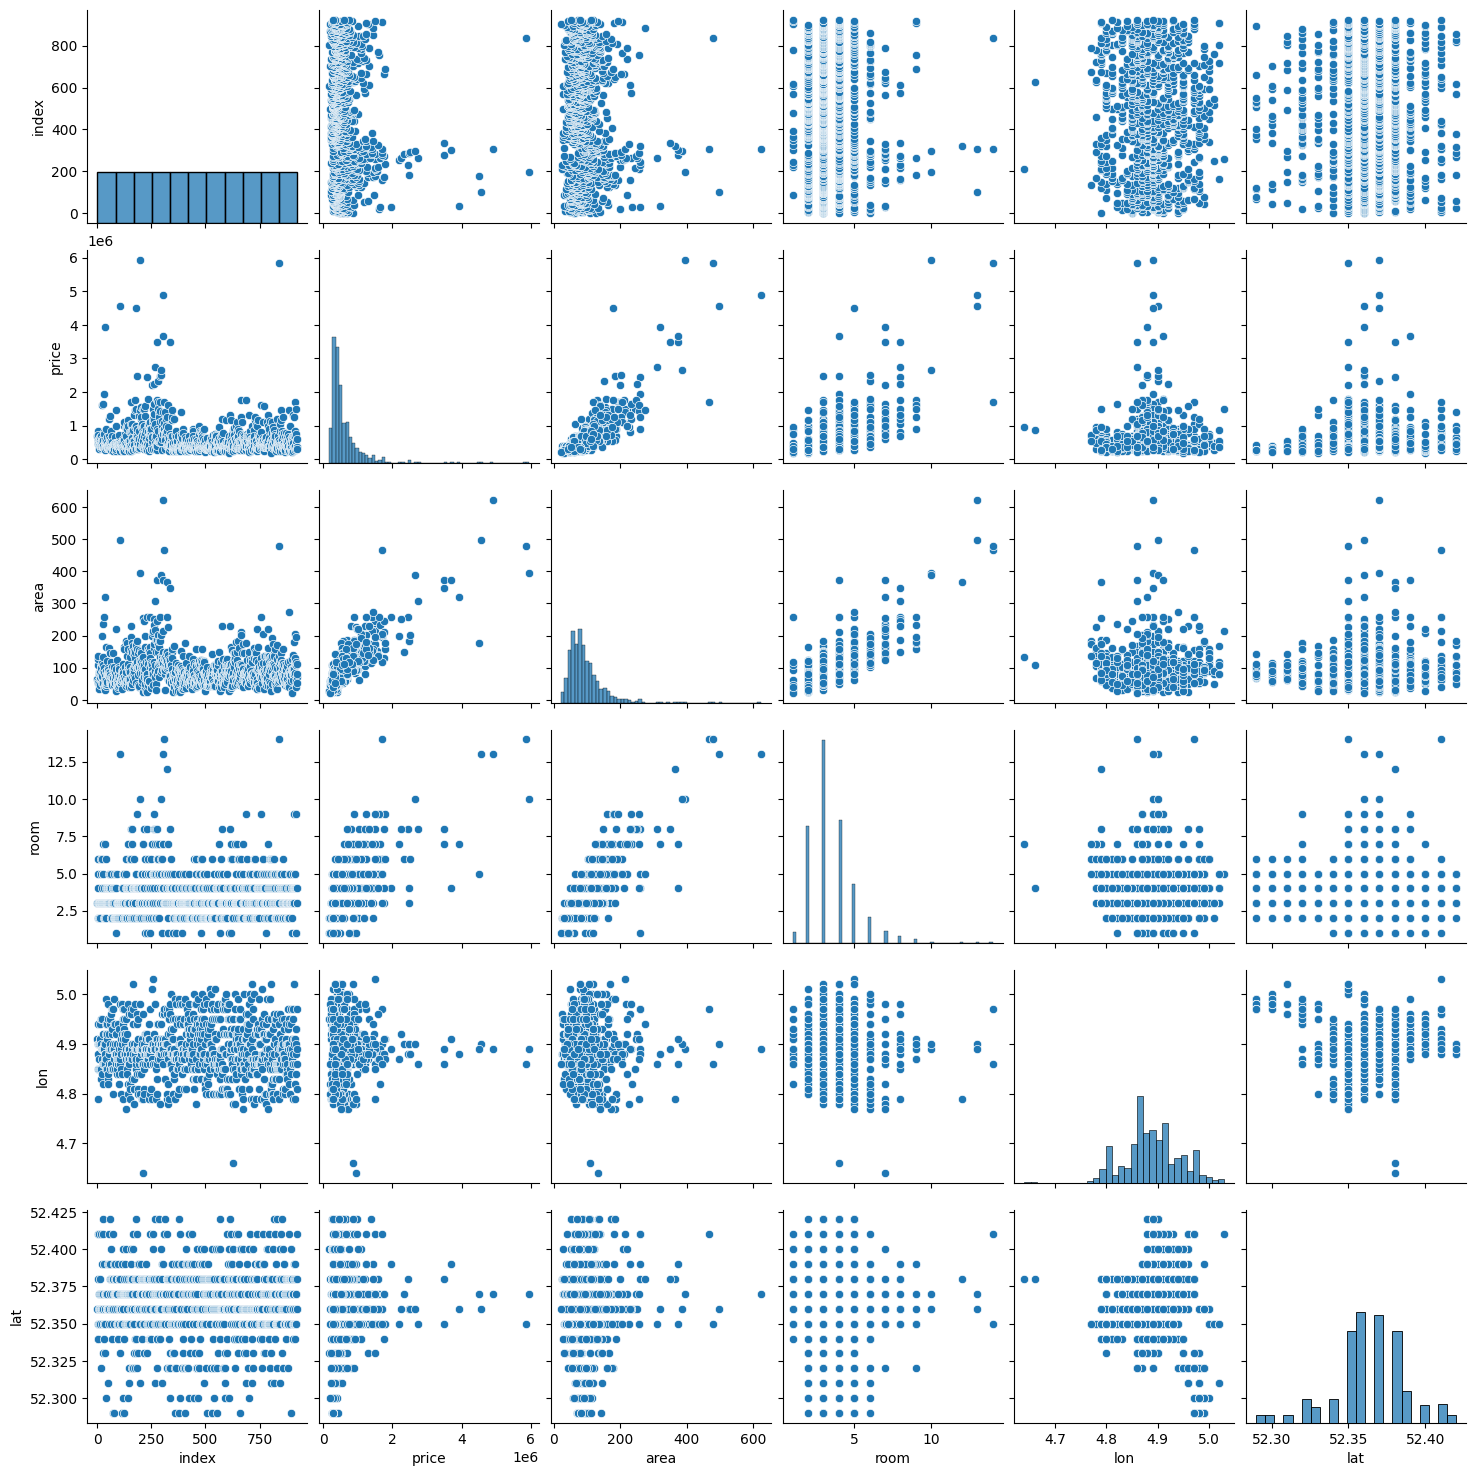

In [4]:
import seaborn as sns
print(df.columns)
print(df.info())
sns.pairplot(df)

Defining features and output

In [5]:
x1 = df[['price', 'area', 'room', 'lon', 'lat']]
x2 = df[['index', 'address', 'zip']]

X = x1.drop("price", axis=True)
Y = df['price']
#sns.pairplot(X)
print(Y.head())
print(Y.describe())
print(Y.isnull().sum())

0    685000.0
1    475000.0
2    850000.0
3    580000.0
4    720000.0
Name: price, dtype: float64
count    9.200000e+02
mean     6.220654e+05
std      5.389942e+05
min      1.750000e+05
25%      3.500000e+05
50%      4.670000e+05
75%      7.000000e+05
max      5.950000e+06
Name: price, dtype: float64
4


Dropping NaN and Filling with mean values in price column

In [6]:
Y = pd.to_numeric(Y, errors="coerce")
Y = Y.fillna(Y.mean())
df["Y"] = Y

EDA --Explatory data analysis

In [7]:
print(X.corr())

          area      room       lon       lat
area  1.000000  0.812421  0.015776  0.024277
room  0.812421  1.000000 -0.036087 -0.015439
lon   0.015776 -0.036087  1.000000 -0.181391
lat   0.024277 -0.015439 -0.181391  1.000000


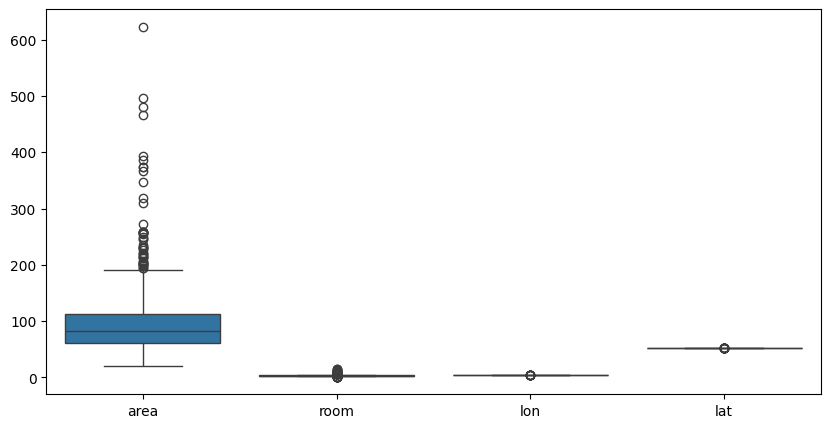

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data = X, ax=ax)
plt.savefig('boxplot.jpg')

Scaling of features using standardscaler

Importing train test split from sklearn

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('Length of X_test_scaled:', len(X_test_scaled))
print('Length of X_train_scaled:', len(X_train_scaled))
print('X_test:', X_test[:5])
print('\nX_test_scaled:', X_test_scaled)


Length of X_test_scaled: 185
Length of X_train_scaled: 739
X_test:       area  room   lon    lat
323  120.0     5  4.96  52.32
861   61.0     3  4.88  52.39
30    98.0     3  4.90  52.35
837  480.0    14  4.86  52.35
294   88.0     5  4.90  52.36

X_test_scaled: [[ 4.81518934e-01  9.51440060e-01  1.34264166e+00 -1.77551173e+00]
 [-6.28489897e-01 -3.59117637e-01 -1.68437246e-01  1.10913720e+00]
 [ 6.76173357e-02 -3.59117637e-01  2.09332480e-01 -5.39233620e-01]
 [ 7.25445417e+00  6.84894970e+00 -5.46206972e-01 -5.39233620e-01]
 [-1.20519754e-01  9.51440060e-01  2.09332480e-01 -1.27140916e-01]
 [ 4.25077807e-01  9.51440060e-01  2.04476171e-02 -5.39233620e-01]
 [-4.40352807e-01  2.96161212e-01 -1.67951615e+00  6.97044494e-01]
 [-4.02725389e-01  2.96161212e-01 -1.11286156e+00 -1.27140916e-01]
 [-6.09676188e-01 -3.59117637e-01 -3.57322109e-01 -1.27140916e-01]
 [-7.41372151e-01 -3.59117637e-01 -7.35091836e-01 -5.39233620e-01]
 [ 1.42872172e-01 -3.59117637e-01  1.53152652e+00  2.84951789e-01]


Boxplot to identify outliers in X_train_scaled dataset

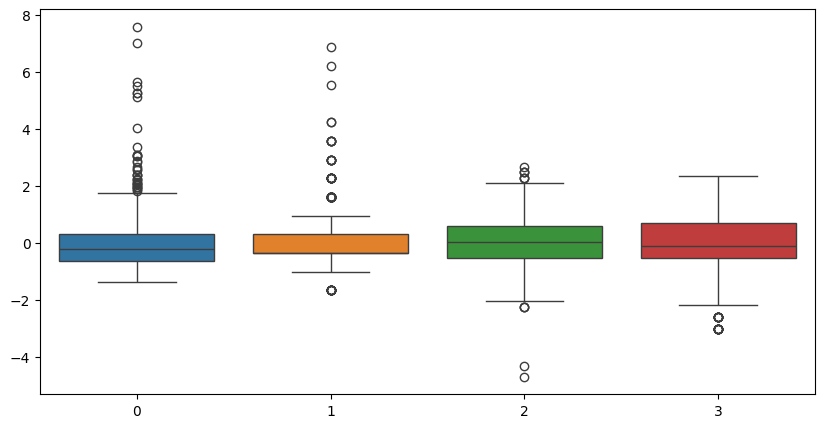

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data = X_train_scaled, ax=ax)
plt.savefig('boxplot.jpg')

Boxplot to identify outliers in X_test_scaled dataset

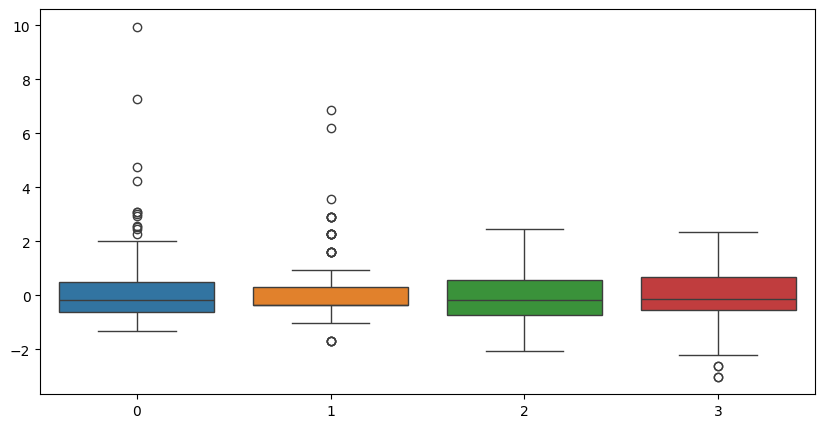

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data = X_test_scaled, ax=ax)
plt.savefig('boxplot.jpg')

Fixing outliers using IQR method

In [12]:
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X.columns
)
X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=X.columns
)
X_train_scaled_df_reset = X_train_scaled_df.reset_index(drop=True)
Y_train_reset = Y_train.reset_index(drop=True)
print(X_train_scaled_df_reset.shape, Y_train_reset.shape)
Q1 =X_train_scaled_df_reset.quantile(0.25)
Q3 = X_train_scaled_df_reset.quantile(0.75)
IQR = Q3-Q1
lower_limit =Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
#print('Lower Limit:', lower_limit)
#print('Uower Limit:', upper_limit)
outliers = ((X_train_scaled_df_reset<lower_limit)|(X_train_scaled_df_reset>upper_limit)).any(axis =1)
#print(outliers)
print("Number of outlier rows:", outliers.sum())
X_train_clean = X_train_scaled_df_reset[~outliers]   # keep only non-outliers
outliers_aligned = outliers.reindex(Y_train_reset.index, fill_value=False)
Y_train_clean = Y_train_reset[~outliers_aligned]       # keep corresponding targets


#x1_final = x1[(x1>lower_limit)&(x1<upper_limit)].dropna()    
#print(x1_final)

(739, 4) (739,)
Number of outlier rows: 115


(624, 4)
(624,)
       area      room       lon       lat
0 -0.496794 -0.359118  0.964872 -0.539234
1 -0.271029 -1.014396 -0.357322 -1.363419
3 -0.064079 -0.359118  1.720411 -2.187604
4 -0.139333  0.296161  1.153757  0.284952
7 -0.101706 -0.359118  0.020448  2.345415 0    425000.0
1    520000.0
3    295000.0
4    650000.0
7    350000.0
Name: price, dtype: float64


c:\Users\awneesh.kumar\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


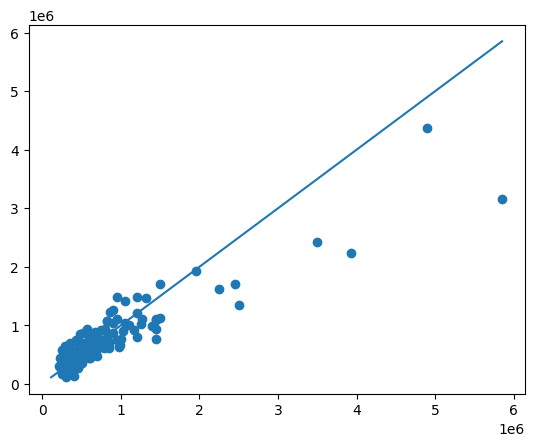

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
print(X_train_clean.shape)
print(Y_train_clean.shape)
print(X_train_clean.head(), Y_train_clean.head())

linear_reg = LinearRegression().fit(X_train_clean, Y_train_clean)
Y_predict_LR = linear_reg.predict(X_test_scaled)
min_val = min(Y_test.min(), Y_predict_LR.min())
max_val = max(Y_test.max(), Y_predict_LR.max())
plt.scatter(Y_test, Y_predict_LR)
plt.plot([min_val, max_val], [min_val, max_val])
plt.show()

323   -2.719767e+05
861    9.072127e+04
30     1.360543e+05
837    2.694754e+06
294    2.188921e+05
           ...     
54    -1.154858e+05
827    1.672969e+05
490    1.396924e+05
753    5.777927e+04
843   -2.089755e+05
Name: price, Length: 185, dtype: float64


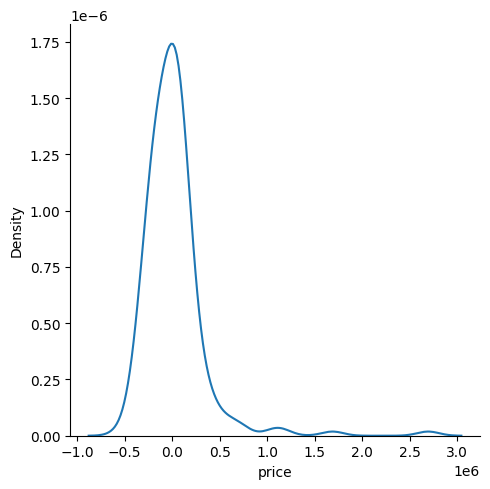

In [14]:
residuals_LR = Y_test -Y_predict_LR
print(residuals_LR)
sns.displot(residuals_LR, kind='kde')

Evaluation matrices

In [15]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
mse_LR = mean_squared_error(Y_test, Y_predict_LR)
mae_LR = mean_absolute_error(Y_test, Y_predict_LR)
r2_LR = r2_score(Y_test, Y_predict_LR)
print("MSE for LR:", mse_LR)
print("MAE for LR:", mae_LR)
print("R2 for LR:", r2_LR)
print(linear_reg.intercept_)

MSE for LR: 109333666799.31749
MAE for LR: 190131.34756129739
R2 for LR: 0.7824506435351934
611596.6998294976


Using log1p transformation

c:\Users\awneesh.kumar\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


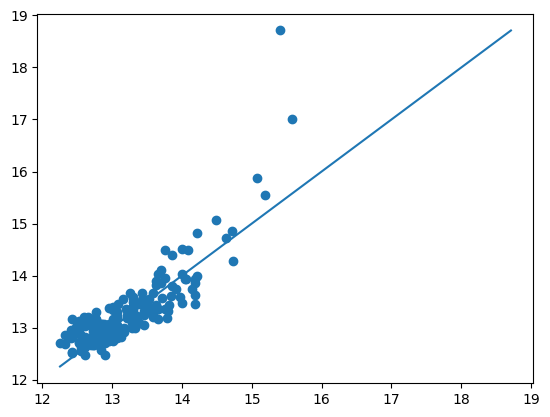

MSE for LR: 0.16395900109456923
MAE for LR: 0.2753279021219367
R2 for LR: 0.5636409826000488


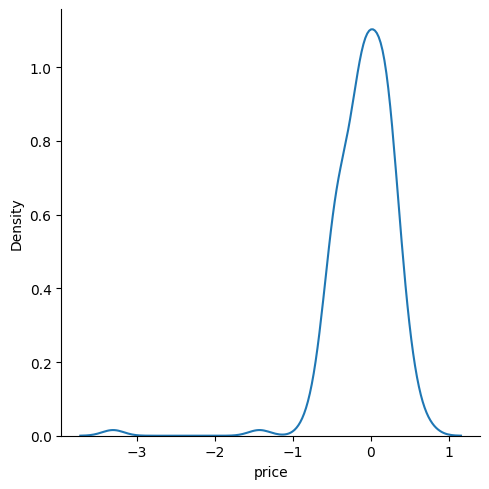

In [16]:
Y_train_clean_log_LR = np.log1p(Y_train_clean)
Y_test_log_LR = np.log1p(Y_test)
linear_reg = LinearRegression().fit(X_train_clean, Y_train_clean_log_LR)
Y_predict_LR_log = linear_reg.predict(X_test_scaled)
min_val = min(Y_test_log_LR.min(), Y_predict_LR_log.min())
max_val = max(Y_test_log_LR.max(), Y_predict_LR_log.max())
plt.scatter(Y_test_log_LR, Y_predict_LR_log)
plt.plot([min_val, max_val], [min_val, max_val])
plt.show()
residuals_LR_log = Y_test_log_LR -Y_predict_LR_log
sns.displot(residuals_LR_log, kind='kde')
mse_LR_log = mean_squared_error(Y_test_log_LR, Y_predict_LR_log)
mae_LR_log = mean_absolute_error(Y_test_log_LR, Y_predict_LR_log)
r2_LR_log = r2_score(Y_test_log_LR, Y_predict_LR_log)
print("MSE for LR:", mse_LR_log)
print("MAE for LR:", mae_LR_log)
print("R2 for LR:", r2_LR_log)


Fitting Non-linear regression models

MSE for SVR: 545019904161.9961
MAE for SVR: 545019904161.9961
R2 for SVR: -0.08446677845888328


c:\Users\awneesh.kumar\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


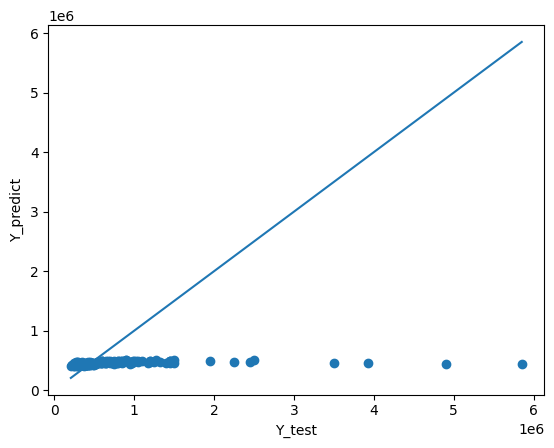

In [17]:
from sklearn.svm import SVR
svr_rbf =SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_NLR = svr_rbf.fit(X_train_clean, Y_train_clean)
Y_predict_SVR = np.asarray(svr_NLR.predict(X_test_scaled))
mse_svr = mean_squared_error(Y_test, Y_predict_SVR)
mae_svr = mean_squared_error(Y_test, Y_predict_SVR)
r2_svr = r2_score(Y_test, Y_predict_SVR)
print('MSE for SVR:', mse_svr)
print('MAE for SVR:', mae_svr)
print('R2 for SVR:', r2_svr)
plt.scatter(Y_test, Y_predict_SVR)
import numpy as np
min_val = min(Y_test.min(), Y_predict_SVR.min())
max_val = max(Y_test.max(), Y_predict_SVR.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.show()

SVR with log1p transformation

MSE for SVR: 0.664953065368205
MAE for SVR: 0.664953065368205
R2 for SVR: -0.08446677845888328


c:\Users\awneesh.kumar\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


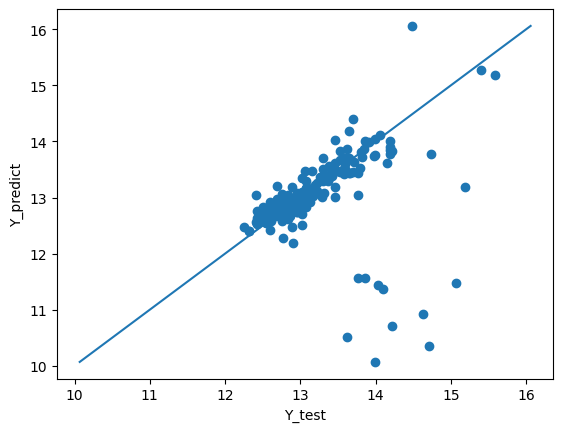

In [18]:
svr_NLR_log = svr_rbf.fit(X_train_clean, Y_train_clean_log_LR)
Y_predict_SVR_log = np.asarray(svr_NLR_log.predict(X_test_scaled))
mse_svr_log = mean_squared_error(Y_test_log_LR, Y_predict_SVR_log)
mae_svr_log = mean_squared_error(Y_test_log_LR, Y_predict_SVR_log)
r2_svr_log = r2_score(Y_test_log_LR, Y_predict_SVR_log)
print('MSE for SVR:', mse_svr_log)
print('MAE for SVR:', mae_svr_log)
print('R2 for SVR:', r2_svr)
plt.scatter(Y_test_log_LR, Y_predict_SVR_log)
import numpy as np
min_val = min(Y_test_log_LR.min(), Y_predict_SVR_log.min())
max_val = max(Y_test_log_LR.max(), Y_predict_SVR_log.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.show()

XGBoost regression model 

In [19]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 6)
XGB_Reg = xgb_reg.fit(X_train_clean, Y_train_clean)
Y_predict_XGB = XGB_Reg.predict(X_test_scaled)
residuals_XGB = Y_test - Y_predict_XGB

Plotting XGBoost results

MSE for XGBoost: 317999941845.92865
MAE for XGBoost: 198513.83766891892
R2 for XGBoost: 0.3672517831912727


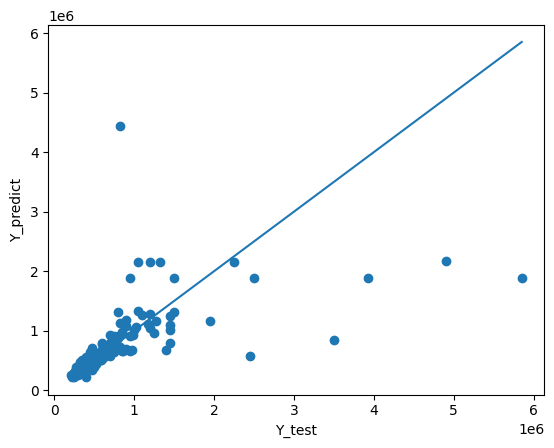

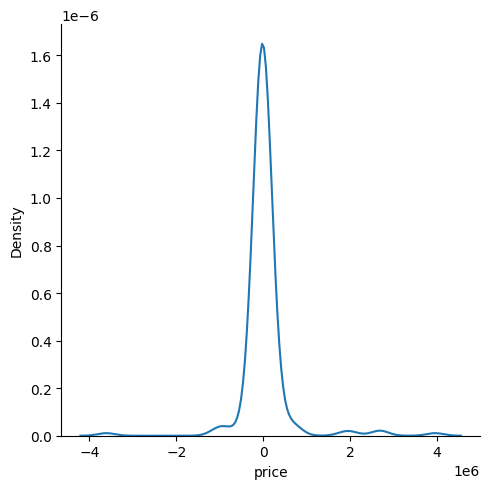

In [20]:
mse_XGB = mean_squared_error(Y_test, Y_predict_XGB)
mae_XGB = mean_absolute_error(Y_test, Y_predict_XGB)
r2_XGB = r2_score(Y_test, Y_predict_XGB)
print('MSE for XGBoost:', mse_XGB)
print('MAE for XGBoost:', mae_XGB)
print('R2 for XGBoost:', r2_XGB)
plt.scatter(Y_test, Y_predict_XGB)
min_val = min(Y_test.min(), Y_predict_XGB.min())
max_val = max(Y_test.max(), Y_predict_XGB.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.show()
sns.displot(residuals_XGB, kind='kde')

Now transforming Y_train and Y_test data using log1p for XGBoost

MSE for XGBoost: 0.06648556075235158
MAE for XGBoost: 0.16617261134625394
R2 for XGBoost: 0.8230559239352316


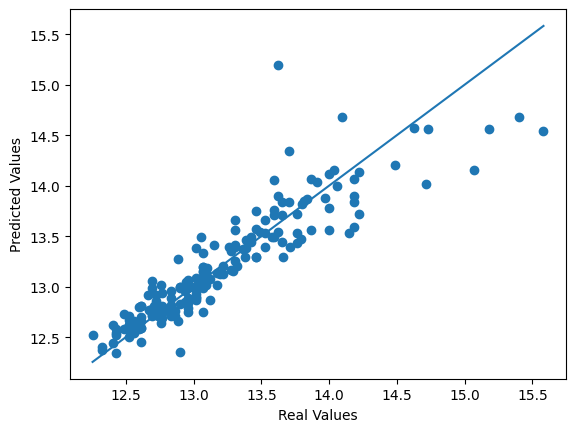

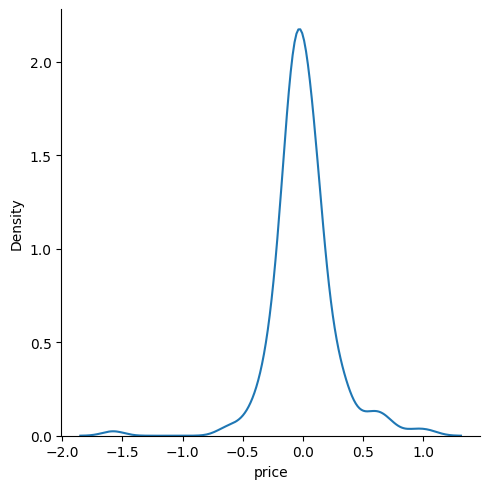

In [21]:
xgb_reg = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 6)
XGB_Reg_log = xgb_reg.fit(X_train_clean, Y_train_clean_log_LR)
Y_predict_XGB_log = XGB_Reg_log.predict(X_test_scaled)
residuals_XGB = Y_test_log_LR - Y_predict_XGB_log
mse_XGB_log = mean_squared_error(Y_test_log_LR, Y_predict_XGB_log)
mae_XGB_log = mean_absolute_error(Y_test_log_LR, Y_predict_XGB_log)
r2_XGB_log = r2_score(Y_test_log_LR, Y_predict_XGB_log)
print('MSE for XGBoost:', mse_XGB_log)
print('MAE for XGBoost:', mae_XGB_log)
print('R2 for XGBoost:', r2_XGB_log)
plt.scatter(Y_test_log_LR, Y_predict_XGB_log)
min_val = min(Y_test_log_LR.min(), Y_predict_XGB_log.min())
max_val = max(Y_test_log_LR.max(), Y_predict_XGB_log.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()
sns.displot(residuals_XGB, kind='kde')

In [22]:
mse_values = {"Linear":mse_LR, "Linear with log transformation":mse_LR_log, 
                "SVR":mse_svr, "SVR with log1p transformation":mse_svr_log,
                "XGBoost":mse_XGB, "XGBoost with log1p transformation":mse_XGB_log}
mae_values = {"Linear":mae_LR, "Linear with log transformation":mae_LR_log, 
                "SVR":mae_svr, "SVR with log1p transformation":mae_svr_log,
                "XGBoost":r2_XGB, "XGBoost with log1p transformation":mae_XGB_log}
r2_values = {"Linear":r2_LR, "Linear with log transformation":r2_LR_log, 
                "SVR":r2_svr, "SVR with log1p transformation":r2_svr_log,
                "XGBoost":r2_XGB, "XGBoost with log1p transformation":r2_XGB_log}

In [25]:
max_r2 =max(r2_values.values())
min_mse = min(mse_values.values())
min_mae = min(mae_values.values())
Best_model = max(r2_values, key=r2_values.get)
print(Best_model, max_r2)


XGBoost with log1p transformation 0.8230559239352316


Streamlit dashboard 

2026-02-02 12:59:42.238 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 12:59:43.054 
  command:

    streamlit run C:\Users\awneesh.kumar\AppData\Roaming\Python\Python314\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-02 12:59:43.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 12:59:43.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 12:59:43.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 12:59:43.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 12:59:43.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-02 12:59:43.

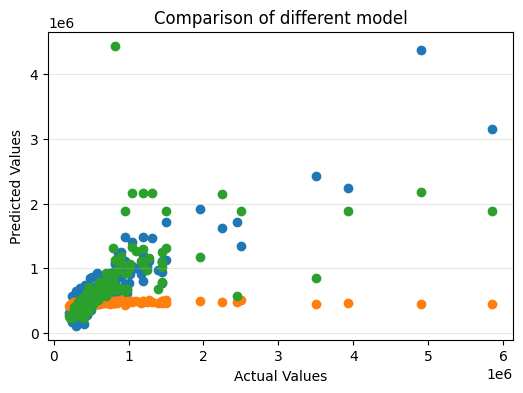

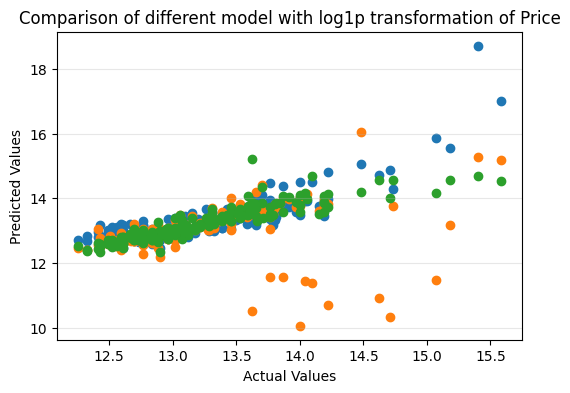

In [24]:
import streamlit as st
st.title("House Price prediction @ Amsterdam")
col1, col2, col3, col4 = st.columns(4)
col1.metric("Best Model", Best_model)
col2.metric("R²", max_r2) 
col3.metric("MSE", min_mse)
col4.metric("MAE", min_mae)
st.divider()
col5, col6 = st.columns(2)
with col5:
    fig1, ax1 = plt.subplots(figsize=(6, 4))
    ax1.scatter(Y_test, Y_predict_LR, label = "Linear")
    ax1.scatter(Y_test, Y_predict_SVR, label = "SVR")
    ax1.scatter(Y_test, Y_predict_XGB, label = 'XGBoost')
    ax1.set_title("Comparison of different model")
    ax1.set_xlabel("Actual Values")
    ax1.set_ylabel("Predicted Values")
    ax1.grid(axis='y', alpha=0.3)
    st.pyplot(fig1)
with col6:
    fig2, ax2 = plt.subplots(figsize=(6, 4))
    ax2.scatter(Y_test_log_LR, Y_predict_LR_log, label = "Linear")
    ax2.scatter(Y_test_log_LR, Y_predict_SVR_log, label = "SVR")
    ax2.scatter(Y_test_log_LR, Y_predict_XGB_log, label = "XGBoost")
    ax2.set_title("Comparison of different model with log1p transformation of Price")
    ax2.set_xlabel("Actual Values")
    ax2.set_ylabel("Predicted Values")
    ax2.grid(axis='y', alpha=0.3)
    st.pyplot(fig2)